**1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.**

K-Means is a centroid-based clustering algorithm that partitions data into K clusters by minimizing the distance between points and their assigned cluster centroid.
Use case: Customer segmentation for targeted marketing where the number of clusters is known.

Hierarchical Clustering builds a tree-like structure of clusters (dendrogram) either by merging (agglomerative) or splitting (divisive) clusters.
Use case: Gene expression data analysis to observe nested relationships between samples.

---

**2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters.
It ranges from -1 to 1:
- High score (~1): points are well-matched to their own cluster and poorly matched to neighboring clusters.
- Low score (~0): points are on or near the boundary between clusters.
- Negative score: points may have been assigned to the wrong cluster.

---

**3. What are the core parameters of DBSCAN, and how do they influence the clustering process?**

The core parameters are:
- eps: the maximum distance between two samples for them to be considered neighbors. Larger eps produces fewer, larger clusters.
- min_samples: minimum number of points required to form a dense region. Higher min_samples can result in more points being labeled as noise.

These parameters determine cluster density and noise detection.

---

**4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**

Feature scaling ensures that all features contribute equally to distance calculations.
Without scaling, features with larger numeric ranges can dominate the distance metric, leading to biased cluster assignments.

---

**5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**

The Elbow Method plots the within-cluster sum of squares (WCSS) against the number of clusters.
The "elbow point" where the rate of decrease sharply changes indicates the optimal number of clusters, balancing cluster compactness and simplicity.

---


# Practial Questions

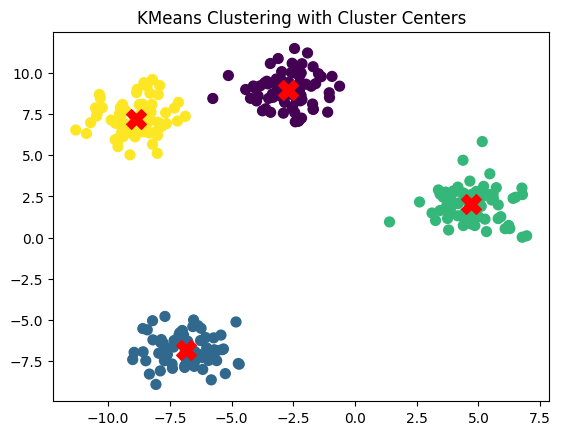

In [2]:
#6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate data
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title("KMeans Clustering with Cluster Centers")
plt.show()

In [6]:
#7. Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model. Print the number of clusters found (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load data
data = load_wine()
X = data.data

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise labeled as -1)
n_clusters = len(set(y_db)) - (1 if -1 in y_db else 0)
print("Number of clusters found:", n_clusters)

Number of clusters found: 0


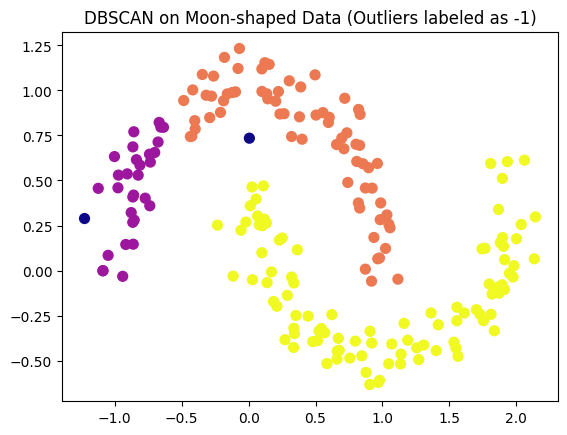

In [7]:
#8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

from sklearn.datasets import make_moons

# Generate moon-shaped data
X_moons, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
y_moons = dbscan_moons.fit_predict(X_moons)

# Plot
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap='plasma', s=50)
plt.title("DBSCAN on Moon-shaped Data (Outliers labeled as -1)")
plt.show()

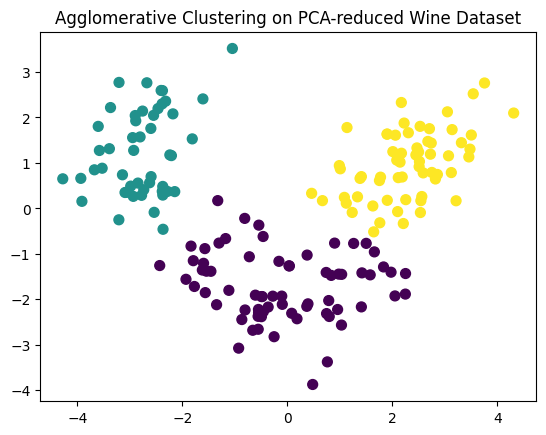

In [8]:
#9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on PCA-reduced Wine Dataset")
plt.show()

Silhouette Score for K-Means: 0.2803075523037022


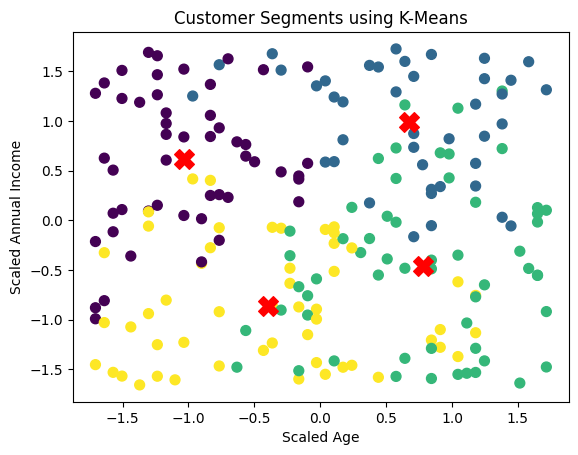

Number of clusters found by DBSCAN: 1


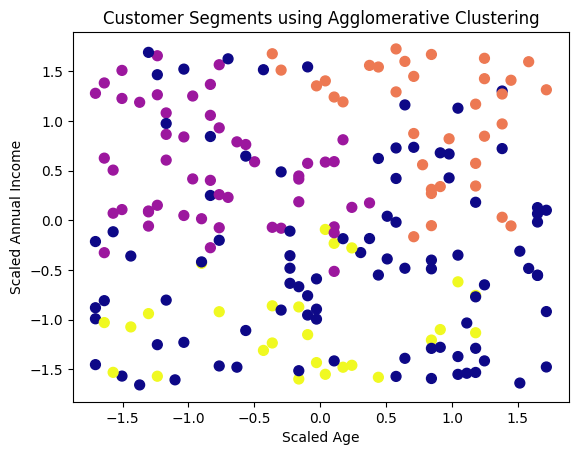

In [1]:
# Question 10: You are working as a data analyst at an e-commerce company.
# The marketing team wants to segment customers based on their purchasing behavior.
# Describe your real-world workflow using clustering.

#ANSWER:
# 1. Preprocessing:
#    - Handle missing values with median/mode or imputation.
#    - Scale features using StandardScaler or MinMaxScaler.
# 2. Algorithm choice:
#    - K-Means for well-separated clusters.
#    - DBSCAN for irregular shapes and outlier detection.
#    - Hierarchical Clustering for nested patterns.
# 3. Determining number of clusters:
#    - Elbow Method, Silhouette Score, or dendrogram inspection.
# 4. Evaluation:
#    - Validate clusters with Silhouette Score and business insights.
# 5. Business Benefit:
#    - Enables targeted promotions.
#    - Identifies high-value or niche customer segments.
#    - Improves marketing ROI through personalized campaigns.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Simulate customer data (replace with your real dataset)
np.random.seed(42)
n_customers = 200
customer_data = pd.DataFrame({
    'Age': np.random.randint(18, 70, n_customers),
    'Annual_Income': np.random.randint(20000, 120000, n_customers),
    'Spending_Score': np.random.randint(1, 100, n_customers)
})

# 2. Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data)

# 3. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# 4. Evaluate K-Means
sil_score = silhouette_score(X_scaled, labels_kmeans)
print("Silhouette Score for K-Means:", sil_score)

# 5. Visualize K-Means clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X')
plt.title("Customer Segments using K-Means")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.show()

# 6. Optional: Apply DBSCAN for irregular clusters / outlier detection
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print("Number of clusters found by DBSCAN:", n_clusters_dbscan)

# 7. Optional: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_agg, cmap='plasma', s=50)
plt.title("Customer Segments using Agglomerative Clustering")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.show()